In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("./output/data.csv")
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26.0,"21,5",12,E10,0,0,0
1,12.0,4.2,30.0,"21,5",13,E10,0,0,0
2,11.2,5.5,38.0,"21,5",15,E10,0,0,0
3,12.9,3.9,36.0,"21,5",14,E10,0,0,0
4,18.5,4.5,46.0,"21,5",15,E10,0,0,0


In [44]:
data.shape

(388, 9)

In [45]:
data.dtypes

distance        float64
consume         float64
speed           float64
temp_inside      object
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [46]:
# In order to develop a prediction model, we drop null values
perc_null_col = data.isnull().sum().apply(lambda x: x/data.shape[0]).sort_values(ascending=False)
perc_null_col

temp_inside     0.030928
sun             0.000000
rain            0.000000
AC              0.000000
gas_type        0.000000
temp_outside    0.000000
speed           0.000000
consume         0.000000
distance        0.000000
dtype: float64

In [47]:
data = data.dropna(axis=0, subset=['temp_inside'])

In [48]:
perc_null_col = data.isnull().sum().apply(lambda x: x/data.shape[0]).sort_values(ascending=False)
perc_null_col

sun             0.0
rain            0.0
AC              0.0
gas_type        0.0
temp_outside    0.0
temp_inside     0.0
speed           0.0
consume         0.0
distance        0.0
dtype: float64

In [49]:
data.shape

(376, 9)

In [50]:
# We turn all number to float
def comma_to_float(df,column_name):
    index = df.columns.get_loc(column_name)
    for i in range(len(df[column_name])):
        value = df.iloc[i,index]
        value_list = value.split(',')
        if len(value_list) == 2:
            new_value = float(''.join(value_list)) / 10
            data.iloc[i,index] = new_value
        else:
            data.iloc[i,index] = float(value)

In [51]:
comma_to_float(data, 'temp_inside')
data['temp_inside'] = data['temp_inside'].astype(float)

In [52]:
data.dtypes

distance        float64
consume         float64
speed           float64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [53]:
# As it says in the example, I try to use a linear regression but at it was said it is not a good model, the score is not good.
le = preprocessing.LabelEncoder()

In [56]:
data["gas_type"] = le.fit_transform(data["gas_type"])
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26.0,21.5,12,0,0,0,0
1,12.0,4.2,30.0,21.5,13,0,0,0,0
2,11.2,5.5,38.0,21.5,15,0,0,0,0
3,12.9,3.9,36.0,21.5,14,0,0,0,0
4,18.5,4.5,46.0,21.5,15,0,0,0,0


In [57]:
lr = LinearRegression()


In [58]:
# all predictors but the consume
X=data.drop("consume", axis=1)
# target
y=data["consume"]

In [59]:
lr.fit(X, y)

LinearRegression()

In [61]:
lr.predict(X)[:10]

array([5.18272568, 5.03744474, 4.80929959, 4.88883501, 4.67535209,
       4.7756542 , 4.86563976, 5.12533224, 5.44848656, 5.19323132])

In [62]:
lr.score(X, y)

0.20630359179554114

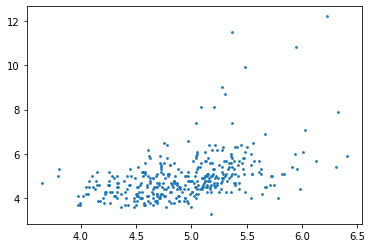

In [65]:
plt.scatter(lr.predict(X), y, s=3)


In [68]:
# I decides to try differents model and it looks like randon forest is the one that best works.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [69]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBClassifier

In [70]:
# We train different model to see which give us less error
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "rdm": RandomForestRegressor(),
}

In [71]:
for name, model in models.items():
        print(f"Entrenando modelo ---> {name}")
        model.fit(X_train,y_train)
        print(f"He acabado ;)")

Entrenando modelo ---> ridge
He acabado ;)
Entrenando modelo ---> lasso
He acabado ;)
Entrenando modelo ---> sgd
He acabado ;)
Entrenando modelo ---> knn
He acabado ;)
Entrenando modelo ---> gradient
He acabado ;)
Entrenando modelo ---> rdm
He acabado ;)


In [72]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2: ", metrics.r2_score(y_test,y_pred))

    print("\n")

--------ridge--------
MAE:  0.6794434391580145
MSE:  0.8733864401879697
RMSE:  0.9345514647080544
R2:  0.13447164618221796


--------lasso--------
MAE:  0.6712452854456664
MSE:  0.8634417206113212
RMSE:  0.9292156480663254
R2:  0.14432689051427294


--------sgd--------
MAE:  349853510144.6082
MSE:  7.952336704350667e+23
RMSE:  891758751252.303
R2:  -7.88078744987157e+23


--------knn--------
MAE:  0.47052631578947374
MSE:  0.41278947368421054
RMSE:  0.6424869443686856
R2:  0.5909245012387534


--------gradient--------
MAE:  0.4848388077101867
MSE:  0.5049826132303605
RMSE:  0.7106212867838682
R2:  0.4995608474963176


--------rdm--------
MAE:  0.432825657894737
MSE:  0.36777813879751475
RMSE:  0.6064471442735259
R2:  0.635530857365874


